In [ ]:
# Deep learning Project
# Date : 02/03/2022
# Author: Sania Terki

#### Demo version: Implementing a pre-trained Mask R-CNN

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!git clone https://github.com/matterport/Mask_RCNN.git 

Mounted at /content/gdrive
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 32.72 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
%cd Mask_RCNN
# downloading COCO weights
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5 

# downloading image test
!wget --quiet https://www.lafriche.org/app/uploads/2020/07/ba3_3878caroline_dutrey-web-1536x1025.jpg #https://media.tacdn.com/media/attractions-splice-spp-674x446/08/ba/6e/0d.jpg 
! ls

/content/Mask_RCNN
assets					   MANIFEST.in	      requirements.txt
ba3_3878caroline_dutrey-web-1536x1025.jpg  mask_rcnn_coco.h5  samples
images					   mrcnn	      setup.cfg
LICENSE					   README.md	      setup.py


In [ ]:
!python3 setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'ma

In [ ]:
#uninstall old version
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0


In [ ]:
#reinstalling specific versions to prevent version error
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

     |████████████████████████████████| 92.6 MB 64 kB/s 
     |████████████████████████████████| 50 kB 3.4 MB/s 
     |████████████████████████████████| 367 kB 39.4 MB/s 
     |████████████████████████████████| 42 kB 851 kB/s 
     |████████████████████████████████| 3.2 MB 35.1 MB/s 
     |████████████████████████████████| 4.1 MB 40.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.
     |██

In [ ]:
# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os

from matplotlib import pyplot
from matplotlib.patches import Rectangle

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
#inherting from Config class
class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_inference"

    #BACKBONE
    BACKBONE = "resnet50"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    #Learning rate
    LEARNING_RATE = 0.02
 
    # number of classes (we would normally add +1 for the background
    # but the background class is *already* included in the class
    # names in the COCO dataset)
    NUM_CLASSES = 1+80

In [ ]:
# creating an instance
config = myMaskRCNNConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.02
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE           

In [ ]:
# initialize the Mask R-CNN model for inference 
print("Loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')

Loading Mask R-CNN model...


In [ ]:
# load the weights for COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)

In [ ]:
os.getcwd()

'/content/Mask_RCNN'

In [ ]:
# define 81 classes that the coco model knowns about along with back ground
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
model.keras_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_image (InputLayer)         (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D) (None, None, None, 3) 0           input_image[0][0]                
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, None, None, 64 9472        zero_padding2d_5[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNorm)             (None, None, None, 64 256         conv1[0][0]                      
___________________________________________________________________________________________

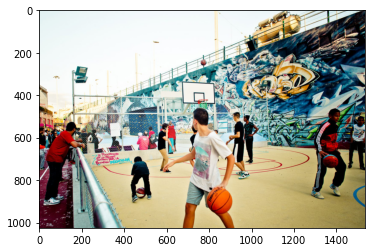

In [ ]:
# load the image into a numpy array and show the original image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img('ba3_3878caroline_dutrey-web-1536x1025.jpg')
#pyplot.imshow(img)
img = img_to_array(img)
pyplot.imshow(img/255)

In [ ]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
  """Drawing bounding box in images"""
  # load the image
  data = pyplot.imread(filename)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box
  for box in boxes_list:
    # get coordinates
    y1, x1, y2, x2 = box
    # calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    # create the shape
    rect = Rectangle((x1, y1), width, height, fill=False, color="blue", lw=5)
    # draw the box
    ax.add_patch(rect)
  # show the plot
  pyplot.show()

In [ ]:
# make prediction
results = model.detect([img], verbose=0)

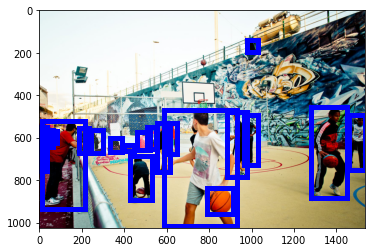

In [ ]:
# visualize the results
draw_image_with_boxes('ba3_3878caroline_dutrey-web-1536x1025.jpg', results[0]['rois'])

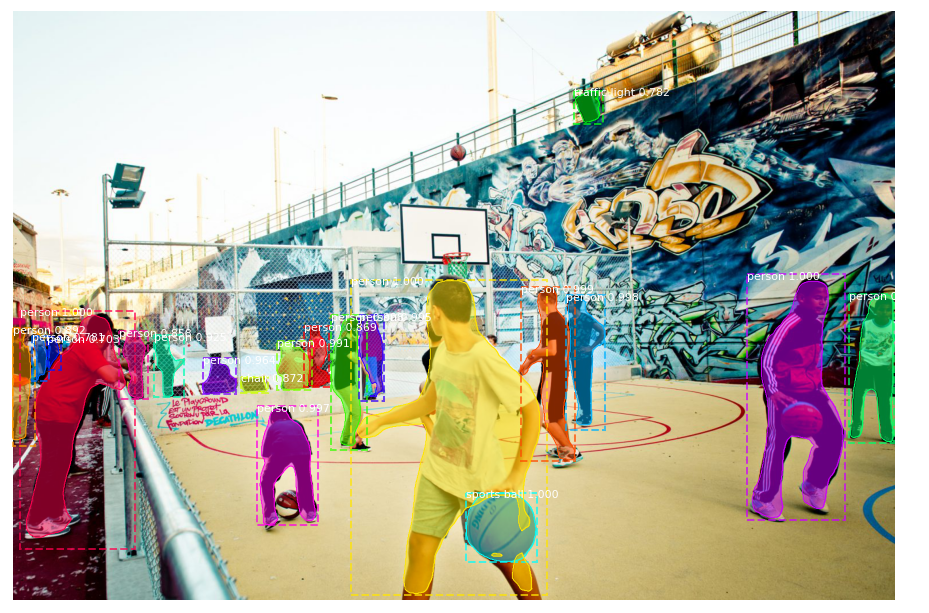

In [ ]:
# get dictionary for first prediction
from mrcnn.visualize import display_instances
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
classes= r['class_ids']
print("Total Objects found", len(classes))
for i in range(len(classes)):
    print(class_names[classes[i]])

Total Objects found 20
sports ball
person
person
person
person
person
person
person
person
person
person
person
person
person
chair
person
person
traffic light
person
person


#### Possible improvements 
* Changing backbone (ResNet50 to ResNet100)
* Reducing the learning rate (0.02 to 0.0001)
* PointRend Enhancement

In [ ]:
#inherting from Config class
class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_inference"

    #BACKBONE
    BACKBONE = "resnet101"

    #Learning rate
    LEARNING_RATE = 0.001
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

 
    # number of classes (we would normally add +1 for the background
    # but the background class is *already* included in the class
    # names in the COCO dataset)
    NUM_CLASSES = 1+80

In [ ]:
config = myMaskRCNNConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

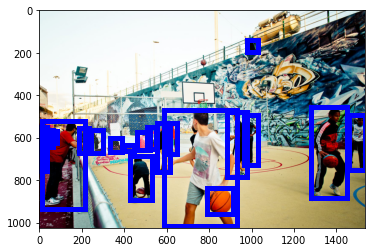

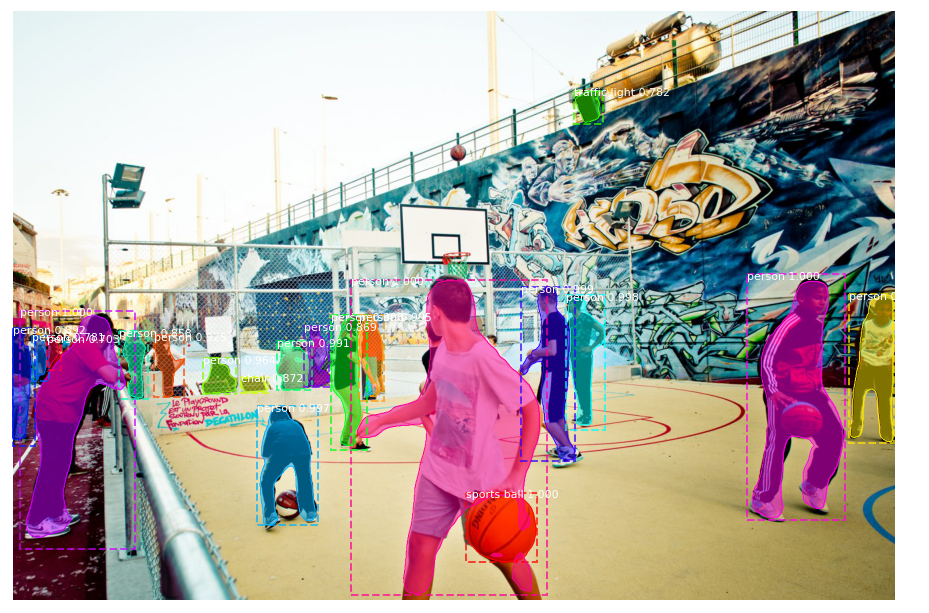

In [ ]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights('mask_rcnn_coco.h5', by_name=True)
results = model.detect([img], verbose=0)
draw_image_with_boxes('ba3_3878caroline_dutrey-web-1536x1025.jpg', results[0]['rois'])
r = results[0]
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
classes= r['class_ids']
print("Total Objects found", len(classes))
for i in range(len(classes)):
    print(class_names[classes[i]])

Total Objects found 20
sports ball
person
person
person
person
person
person
person
person
person
person
person
person
person
chair
person
person
traffic light
person
person
